In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cities = pd.read_csv("../data/cities.csv")
cities.rename(columns = {'id': "city_id"}, inplace=True)
cities.sample(10)

,city_id,name,coords,start_year,url_name,country,country_state
283,230,San Diego,POINT(-117.1666667 32.7),2017.0,san-diego,United States,Calif.
139,325,Toulouse,POINT(1.449926716 43.61995892),2018.0,toulouse,France,NaN
10,17,Belfast,POINT(-5.933333333 54.61666667),2017.0,belfast,Northern Ireland,NaN
82,60,Johannesburg,POINT(28.06666667 -26.2),2017.0,johannesburg,South Africa,NaN
319,107,Shanghai,POINT(121.4666667 31.16666667),1990.0,shanghai,China,NaN
71,294,Le Mans,POINT(0.099983275 48.00041506),2007.0,le-mans,France,NaN
170,338,Neuquén,POINT(-68.045533 -38.95735),NaN,neuquen,Argentina,Neuquén
274,221,Reno,POINT(-119.8166667 39.5),2017.0,reno,United States,Nev.
233,178,Juneau,POINT(-134.4 58.3),2017.0,juneau,United States,Alaska
45,288,Saint-Laurent-du-Maroni,POINT(-54.03253459 5.497624081),2018.0,saint-laurent-du-maroni,France,NaN


In [3]:
lines = pd.read_csv("../data/lines.csv")
lines.sample(16)

,id,city_id,name,url_name,color,system_id,transport_mode_id
369,438,114,Tojo Line,438-tojo-line,#000099,311,4.0
892,977,114,Shin-Okusawa Line,977-shin-okusawa-line,#ee86a7,312,4.0
558,640,114,Mita Line,640-mita-line,#5f0101,325,5.0
226,384,95,L,384-l,#7584bc,298,2.0
945,1033,114,Chuo-Ichiba Line,1033-chuo-ichiba-line,#5f0101,410,5.0
401,530,29,M4,530-m4,#71be1c,22,5.0
295,211,69,C2C,211-nr-(fenchurch-st),#840084,261,2.0
97,85,14,L3,85-l3,#4fbe48,247,NaN
298,161,69,North London Line - Richmond to Stratford via ...,161-overground-(north-london-line),#000000,262,3.0
308,393,95,T 13,393-t-13,#885f30,296,5.0


In [4]:
station_lines = pd.read_csv('../data/station_lines.csv')
station_lines.sample(16)

,id,station_id,line_id,city_id,created_at,updated_at
4041,4151,1020,130,107,2017-11-21 00:00:00,2017-11-21 00:00:00
14810,7672,3767,325,114,2017-11-21 00:00:00,2017-11-21 00:00:00
10607,14777,14480,1337,206,2018-10-11 18:35:41.414117,2018-10-11 18:35:41.414117
5432,5578,2516,49,78,2017-11-21 00:00:00,2017-11-21 00:00:00
8697,10968,11111,994,114,2018-03-28 18:34:02.225559,2018-03-28 18:34:02.225559
15217,8079,4127,328,114,2017-11-21 00:00:00,2017-11-21 00:00:00
2470,2572,8297,675,114,2017-11-21 00:00:00,2017-11-21 00:00:00
1241,1306,6923,285,106,2017-11-21 00:00:00,2017-11-21 00:00:00
6246,14167,13900,1302,206,2018-10-01 20:00:38.244187,2018-10-01 20:00:38.244187
7137,14227,13957,745,206,2018-10-02 14:38:27.441637,2018-10-02 14:38:27.441637


In [5]:
stations = pd.read_csv('../data/stations.csv')
stations

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [6]:
systems = pd.read_csv('../data/stations.csv')
systems

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [7]:
track_lines = pd.read_csv('../data/track_lines.csv')
track_lines

,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48
...,...,...,...,...,...,...
9752,10699,10530,1611,2019-03-06 22:23:46.008756,2019-03-06 22:23:46.008756,91
9753,10700,10531,1611,2019-03-06 22:27:46.532431,2019-03-06 22:27:46.532431,91
9754,10701,10532,1611,2019-03-06 22:30:58.779519,2019-03-06 22:30:58.779519,91
9755,10702,10533,1610,2019-03-08 21:57:21.68915,2019-03-08 21:57:21.68915,91


In [8]:
tracks = pd.read_csv('../data/tracks.csv')
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


<BarContainer object of 5 artists>

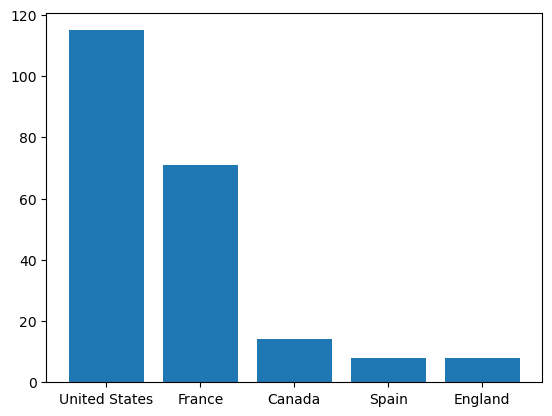

In [17]:
ranked_countries = cities["country"].value_counts().sort_values(ascending=False)

top_five_countries = ranked_countries[0:5]

fig, ax = plt.subplots()

ax.bar(top_five_countries.index, top_five_countries.values)



French Guiana


<BarContainer object of 7 artists>

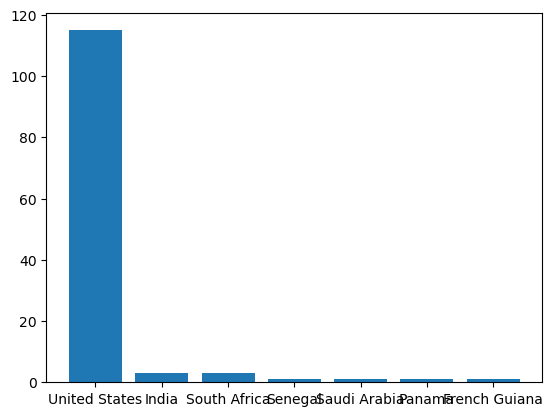

In [11]:


top_country = ranked_countries.max()
top_country_name = ranked_countries.idxmax()

bottom_country = ranked_countries.min()
bottom_country_name = ranked_countries.idxmin()

median_country = ranked_countries.median()
median_country_name = ranked_countries.index[int((len(ranked_countries) -1 ) / 2)]

q3a_country = ranked_countries.iloc[17]
q3a_country_name = ranked_countries.index[17]

q3b_country = ranked_countries.iloc[18]
q3b_country_name = ranked_countries.index[18]


q1a_country = ranked_countries.iloc[-18]
q1a_country_name = ranked_countries.index[-18]

q1b_country = ranked_countries.iloc[-19]
q1b_country_name = ranked_countries.index[-19]

countries = [
    top_country_name, q3a_country_name, 
    q3b_country_name, median_country_name, 
    q1a_country_name, q1b_country_name,
    bottom_country_name]

values = [
    top_country, q3a_country,
    q3b_country, median_country,
    q1a_country, q1b_country,
    bottom_country
]

fig, ax = plt.subplots()

ax.bar(countries, values)




In [18]:
united_states = cities[cities["country"] == "United States"]

united_states

,city_id,name,coords,start_year,url_name,country,country_state
14,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
163,155,Detroit,POINT(-83.05 42.33333333),2017.0,detroit,United States,Mich.
164,170,Helena,POINT(-112.0333333 46.58333333),2017.0,helena,United States,Mont.
165,214,Pierre,POINT(-100.35 44.36666667),2017.0,pierre,United States,S.D.
180,138,Boise,POINT(-116.2166667 43.6),2017.0,boise,United States,Idaho
...,...,...,...,...,...,...,...
300,248,Tulsa,POINT(-95.98333333 36.15),2017.0,tulsa,United States,Okla.
303,251,Virginia Beach,POINT(-75.96666667 36.85),2017.0,virginia-beach,United States,Va.
305,253,Wichita,POINT(-97.28333333 37.71666667),2017.0,wichita,United States,Kan.
306,254,Wilmington,POINT(-77.95 34.23333333),2017.0,wilmington,United States,N.C.
